In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats


In [71]:
x1 = salary
y1 = scoring

salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)


In [72]:
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1)**2)
b1


2.620538882402765

In [73]:
b0 = np.mean(y1) - b1 * np.mean(x1)
b0

444.1773573243596

In [74]:
# Итак, модель линейной регрессии имеет вид: 𝑦=444.18+2.62⋅𝑥,

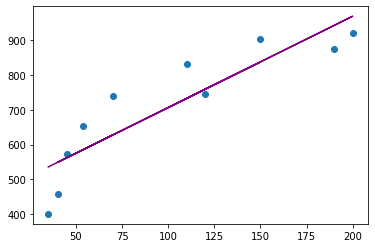

In [75]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='purple')

In [76]:
# Создадим массив из предсказанных значений:

z1 = b0 + b1 * x1


print(f'real: {y1[:10]}')
print(f'pred: {z1[:10]}')


real: [401 574 874 919 459 739 653 902 746 832]
pred: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


In [79]:
# Коэффициент детерминации:

R1 = z1.var() / y1.var()
R1

# Коэффициент детерминации, равный  0.7876, означает, что  79%  дисперсии переменной  𝑦  учитывается или объясняется моделью. Оставшиеся  21%  обусловлены какими-то ещё факторами, которые модель не учла.



0.7876386635293678

In [80]:
# Посчитаем это значение как квадрат коэффициента корреляции между массивами x и y:

np.corrcoef(x1, y1) ** 2


array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

In [81]:
# Ошибка аппроксимации

def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()


In [82]:
mean_approximation_error(y1, z1)

0.11469251843561709

In [83]:
#k - число факторов; 𝑘1=𝑘, 𝑘2=𝑛−𝑘−1; 𝑘1=1, 𝑘2=10−2=8
k1 = 1
k2 = 8

T1 = (R1 / (1 - R1)) * (k2 / k1)
T1

29.67164085966437

In [60]:
# Пусть уровень значимости  𝛼=0.05

alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit


5.317655071578714

In [61]:
  # 𝑇 > 𝐹𝑐𝑟𝑖𝑡 , поэтому уравнение регрессии статистически значимо.

In [62]:
b0, b1

(444.1773573243596, 2.620538882402765)

In [63]:
# Проверим значимость коэффициента наклона, а также построим для него доверительный интервал.
def standard_error_slope(x, y, z):
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)


In [64]:
s_slope = standard_error_slope(x1, y1, z1)
s_slope

0.48108279568516005

In [65]:
# Зададим уровень значимости  𝛼=0.05 . В нашем случае  𝑛=10 , поэтому нас интересует квантиль  𝑡1−0.05/2,8=2,30601 . Значение статистики  𝑇 :

T = b1 / s_slope
T

5.447168150485579

In [84]:
t = 2,30601

(b1 - t * s_slope, b1 + t * s_slope)

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [67]:
def standard_error_intercept(x, y, z):
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [68]:
s_intercept = standard_error_intercept(x1, y1, z1)
s_intercept

56.46649755068153

In [69]:
T = b0 / s_intercept
T

7.866210524668863

In [85]:
(b0 - t * s_intercept, b0 + t * s_intercept)

TypeError: can't multiply sequence by non-int of type 'numpy.float64'